# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

# Import Data

In [2]:
path = r'C:\Users\Eric\Desktop\Data Analytics\Data Immersion\Achievement 6'

In [3]:
df = pd.read_pickle(os.path.join(path,'Data','Prepared Data','05_df.pkl'))

In [4]:
df.head()

,GeoFIPS,State,Year,Unemployed,Employed,Labor_Force,Area_Name,Dom_Mig,Int_Mig,Nat_Inc,...,gov_retire_disability,gov_medical,gov_income,gov_unemployment,gov_veterans,gov_education,gov_other,unemp_rate,unemployment_category,Net_Mig
2,0500000US01001,AL,2010,0.041407,0.428697,0.470104,Autauga,0.002684,0.000456,-0.000128,...,2.389225,2.387655,0.766016,0.205357,0.436237,0.095868,0.241122,0.088081,High Unemployment,0.003140
3,0500000US01003,AL,2010,0.045153,0.411131,0.456284,Baldwin,0.004271,0.000197,-0.000093,...,3.165718,2.684335,0.598306,0.222470,0.247843,0.236631,0.228707,0.098958,High Unemployment,0.004467
4,0500000US01005,AL,2010,0.045413,0.328540,0.373953,Barbour,-0.002525,-0.000037,-0.002196,...,2.825374,3.415084,1.319501,0.235042,0.316647,0.085447,0.211622,0.121440,High Unemployment,-0.002562
5,0500000US01007,AL,2010,0.043944,0.346786,0.390730,Bibb,-0.002580,0.000000,0.000525,...,2.709488,3.028247,0.937473,0.228465,0.212549,0.087276,0.191474,0.112466,High Unemployment,-0.002580
6,0500000US01009,AL,2010,0.042160,0.392307,0.434467,Blount,0.000157,-0.000035,0.000924,...,2.780535,2.729469,0.746357,0.228423,0.195814,0.095876,0.205609,0.097039,High Unemployment,0.000122


# Prepared Data for k-means

### Remove non-numerical columns

In [5]:
df.dtypes

GeoFIPS                   object
State                     object
Year                       int32
Unemployed               float64
Employed                 float64
Labor_Force              float64
Area_Name                 object
Dom_Mig                  float64
Int_Mig                  float64
Nat_Inc                  float64
Deaths                   float64
Births                   float64
Pop_Change               float64
Pop_Est                    int32
GeoName                   object
gov_retire_disability    float64
gov_medical              float64
gov_income               float64
gov_unemployment         float64
gov_veterans             float64
gov_education            float64
gov_other                float64
unemp_rate               float64
unemployment_category     object
Net_Mig                  float64
dtype: object

In [6]:
cols_to_remove = ['GeoFIPS','State','Area_Name',
                  'GeoName','unemployment_category','Pop_Est','Year']
df_k = df.drop(columns=cols_to_remove)


In [7]:
df_k

,Unemployed,Employed,Labor_Force,Dom_Mig,Int_Mig,Nat_Inc,Deaths,Births,Pop_Change,gov_retire_disability,gov_medical,gov_income,gov_unemployment,gov_veterans,gov_education,gov_other,unemp_rate,Net_Mig
2,0.041407,0.428697,0.470104,0.002684,0.000456,-0.000128,0.002866,0.002739,0.003213,2.389225,2.387655,0.766016,0.205357,0.436237,0.095868,0.241122,0.088081,0.003140
3,0.045153,0.411131,0.456284,0.004271,0.000197,-0.000093,0.002911,0.002818,0.004626,3.165718,2.684335,0.598306,0.222470,0.247843,0.236631,0.228707,0.098958,0.004467
4,0.045413,0.328540,0.373953,-0.002525,-0.000037,-0.002196,0.004794,0.002598,-0.004684,2.825374,3.415084,1.319501,0.235042,0.316647,0.085447,0.211622,0.121440,-0.002562
5,0.043944,0.346786,0.390730,-0.002580,0.000000,0.000525,0.001399,0.001924,-0.001968,2.709488,3.028247,0.937473,0.228465,0.212549,0.087276,0.191474,0.112466,-0.002580
6,0.042160,0.392307,0.434467,0.000157,-0.000035,0.000924,0.002283,0.003207,0.000941,2.780535,2.729469,0.746357,0.228423,0.195814,0.095876,0.205609,0.097039,0.000122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31415,0.020216,0.485747,0.505963,-0.017712,0.000543,0.004912,0.007038,0.011950,-0.012163,3.531351,2.392202,0.363484,0.095199,0.371183,0.127979,0.410221,0.039955,-0.017169
31416,0.019136,0.661481,0.680617,-0.001577,0.003367,0.006521,0.003196,0.009717,0.008311,3.247528,1.840479,0.125682,0.130242,0.117371,0.073048,0.407688,0.028115,0.001790
31417,0.018194,0.440621,0.458815,-0.009196,0.000000,0.005884,0.006724,0.012608,-0.003263,3.644072,3.003362,0.459804,0.061456,0.351281,0.073025,0.412143,0.039655,-0.009196
31418,0.020756,0.479436,0.500192,-0.007687,-0.000641,-0.000897,0.011531,0.010634,-0.009225,4.516336,4.395003,0.438053,0.073158,0.430750,0.072646,0.411531,0.041496,-0.008328


# Elbow Technique

In [8]:
num_c1 = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_c1]

In [9]:
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

In [10]:
score = [kmeans[i].fit(df_k).score(df_k) for i in range(len(kmeans))]

In [11]:
score

[-80327.54625524931,
 -43644.31985136712,
 -32731.916668959126,
 -27698.755648198156,
 -24026.9524245053,
 -21298.580834373493,
 -19204.30775743465,
 -17871.52553837323,
 -16650.33395239244]

### Plot scores to determine best number of clusters

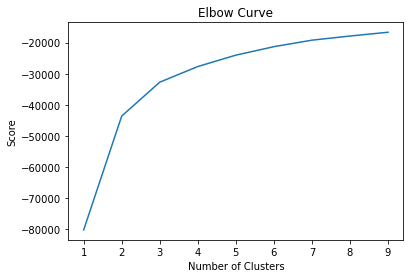

In [12]:
pl.plot(num_c1,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Four clusters seems to be an adequate amount without risking over clustering the data.  That is the number of clusters that will be used.

# K-means clustering

In [13]:
kmeans = KMeans(n_clusters = 4, n_jobs = -1)

In [14]:
kmeans.fit(df_k)

C:\Users\Eric\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [15]:
df_k['clusters'] = kmeans.fit_predict(df_k)

C:\Users\Eric\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [16]:
df_k.head()

,Unemployed,Employed,Labor_Force,Dom_Mig,Int_Mig,Nat_Inc,Deaths,Births,Pop_Change,gov_retire_disability,gov_medical,gov_income,gov_unemployment,gov_veterans,gov_education,gov_other,unemp_rate,Net_Mig,clusters
2,0.041407,0.428697,0.470104,0.002684,0.000456,-0.000128,0.002866,0.002739,0.003213,2.389225,2.387655,0.766016,0.205357,0.436237,0.095868,0.241122,0.088081,0.003140,0
3,0.045153,0.411131,0.456284,0.004271,0.000197,-0.000093,0.002911,0.002818,0.004626,3.165718,2.684335,0.598306,0.222470,0.247843,0.236631,0.228707,0.098958,0.004467,0
4,0.045413,0.328540,0.373953,-0.002525,-0.000037,-0.002196,0.004794,0.002598,-0.004684,2.825374,3.415084,1.319501,0.235042,0.316647,0.085447,0.211622,0.121440,-0.002562,1
5,0.043944,0.346786,0.390730,-0.002580,0.000000,0.000525,0.001399,0.001924,-0.001968,2.709488,3.028247,0.937473,0.228465,0.212549,0.087276,0.191474,0.112466,-0.002580,0
6,0.042160,0.392307,0.434467,0.000157,-0.000035,0.000924,0.002283,0.003207,0.000941,2.780535,2.729469,0.746357,0.228423,0.195814,0.095876,0.205609,0.097039,0.000122,0


In [17]:
df_k['clusters'].value_counts()

1    12448
3     8629
0     7309
2     2514
Name: clusters, dtype: int64

# Plots

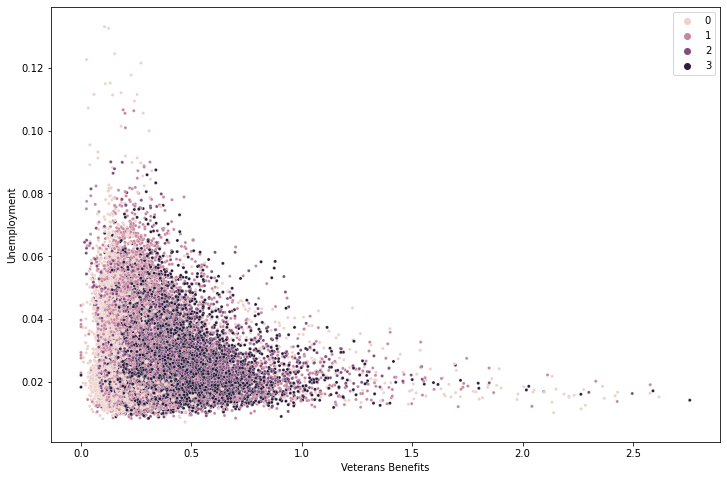

In [18]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['gov_veterans'],
                     y = df_k['Unemployed'],hue = kmeans.labels_,
                    s = 10)
ax.grid(False)
plt.xlabel('Veterans Benefits')
plt.ylabel('Unemployment')
plt.show()

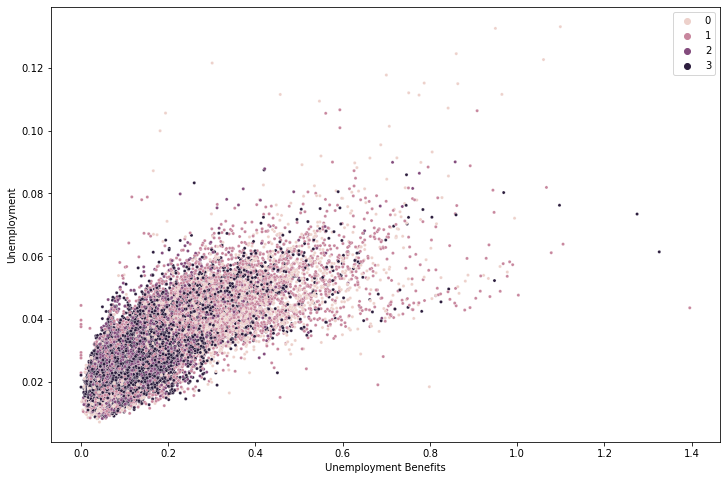

In [19]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['gov_unemployment'],
                     y = df_k['Unemployed'],hue = kmeans.labels_,
                    s = 10)
ax.grid(False)
plt.xlabel('Unemployment Benefits')
plt.ylabel('Unemployment')
plt.show()

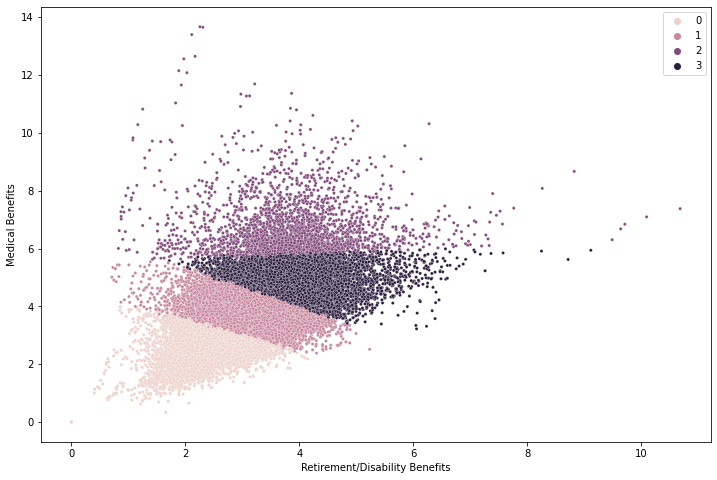

In [20]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['gov_retire_disability'],
                     y = df_k['gov_medical'],hue = kmeans.labels_,
                    s = 10)
ax.grid(False)
plt.xlabel('Retirement/Disability Benefits')
plt.ylabel('Medical Benefits')
plt.show()

The clustering methods do not very clearly show the data on the scatterplots, as there is too much data to make a clear distinction between variables.  Let's look at a correlation heatmap to see what kind of correlations there are across all of our data.

In [21]:
corr = sns.heatmap(df_k.corr(),annot = True, ax = ax)

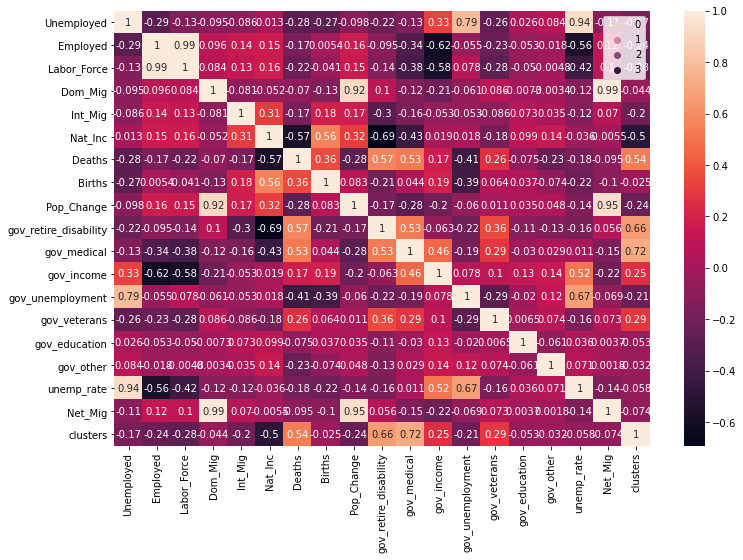

In [22]:
corr.figure

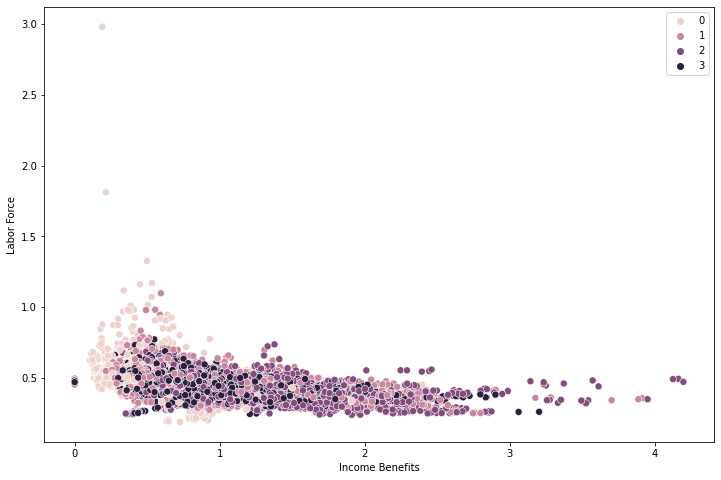

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['gov_income'],
                     y = df_k['Labor_Force'],hue = kmeans.labels_,
                    s = 50)
ax.grid(False)
plt.xlabel('Income Benefits')
plt.ylabel('Labor Force')
plt.show()

The plots above show some correlations, but I think more info being found in the descriptive statistics may be helpful.

# Groupby Descriptive Statistics

In [24]:
df_k.groupby('clusters').agg({'gov_unemployment':['mean','median'],
                             'gov_income':['mean','median'],
                             'gov_veterans':['mean','median'],
                             'unemp_rate':['mean','median']
})

gov_unemployment           gov_income           gov_veterans  \
                     mean    median       mean    median         mean   
clusters                                                                
0                0.189971  0.146008   0.634417  0.585667     0.260892   
1                0.167115  0.125873   0.818397  0.765353     0.307813   
2                0.117857  0.092738   1.172934  1.059303     0.442422   
3                0.118090  0.089856   0.878476  0.825440     0.404693   

                   unemp_rate            
            median       mean    median  
clusters                                 
0         0.203466   0.062386  0.058012  
1         0.268203   0.065666  0.059490  
2         0.407539   0.064113  0.056534  
3         0.369442   0.059055  0.052397

It appears that as the population of an area increases, there is also an increase in unemployment rate according to the clusters.  There also seems to be an inverse correlation between the population estimate and the veterans benefits that are received.  This info is useful, as it indicates the population of an area may be a factor in the unemployment and government benefits per capita.  This could be assessed in a time-series as well, over the course of the ten years of data that is available.

# Export Data

In [25]:
cluster_list = df_k['clusters'].tolist()

In [26]:
cluster_list

[0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 2,
 3,
 3,
 3,
 0,
 1,
 3,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 3,
 0,
 1,
 3,
 1,
 0,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 3,
 0,
 0,
 3,
 3,
 1,
 1,
 0,
 0,
 3,
 1,
 0,
 3,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 1,
 3,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,


In [27]:
df['cluster'] = cluster_list

In [28]:
df.head()

,GeoFIPS,State,Year,Unemployed,Employed,Labor_Force,Area_Name,Dom_Mig,Int_Mig,Nat_Inc,...,gov_medical,gov_income,gov_unemployment,gov_veterans,gov_education,gov_other,unemp_rate,unemployment_category,Net_Mig,cluster
2,0500000US01001,AL,2010,0.041407,0.428697,0.470104,Autauga,0.002684,0.000456,-0.000128,...,2.387655,0.766016,0.205357,0.436237,0.095868,0.241122,0.088081,High Unemployment,0.003140,0
3,0500000US01003,AL,2010,0.045153,0.411131,0.456284,Baldwin,0.004271,0.000197,-0.000093,...,2.684335,0.598306,0.222470,0.247843,0.236631,0.228707,0.098958,High Unemployment,0.004467,0
4,0500000US01005,AL,2010,0.045413,0.328540,0.373953,Barbour,-0.002525,-0.000037,-0.002196,...,3.415084,1.319501,0.235042,0.316647,0.085447,0.211622,0.121440,High Unemployment,-0.002562,1
5,0500000US01007,AL,2010,0.043944,0.346786,0.390730,Bibb,-0.002580,0.000000,0.000525,...,3.028247,0.937473,0.228465,0.212549,0.087276,0.191474,0.112466,High Unemployment,-0.002580,0
6,0500000US01009,AL,2010,0.042160,0.392307,0.434467,Blount,0.000157,-0.000035,0.000924,...,2.729469,0.746357,0.228423,0.195814,0.095876,0.205609,0.097039,High Unemployment,0.000122,0


In [29]:
df.to_csv(os.path.join(path,'Data','Prepared Data','clean_data.csv'),index = False)